In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsp
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel('/home/cocochamba/Downloads/exam.xlsx').dropna()
data

,Unnamed: 0,Баталова,Вавакин,Громов,Достовалов,Зотин,Кардашин,Козловец,Коновалова,Кузнецов,Миронова,Наугольнова,Нёма,Николаева,Серебрякова,Слюсарев,Спиридонова,Тарасова
0,1кв1963,-0.013344,7.936209,0.014163,3.008081,0.988984,4.013953,7.013636,5.984928,0.028092,9.969593,3.013143,5.000549,0.029005,-0.002878,4.999620,0.010742,0.024080
1,2кв1963,0.007315,7.909458,-0.000409,3.016692,0.979978,4.004163,7.019562,5.995905,0.035104,9.959352,3.018497,4.994386,0.023308,-0.003146,4.998164,0.009717,0.017845
2,3кв1963,0.020961,7.887354,0.002292,3.009357,0.963100,4.006233,7.010631,6.011683,0.010859,9.947271,3.019563,4.987919,0.028023,0.011401,5.009009,0.000197,0.011704
3,4кв1963,0.007569,7.849866,-0.002121,3.004972,0.955777,4.000868,6.992681,6.043446,-0.001091,9.943469,3.033014,4.973767,0.033017,-0.003824,5.003461,0.013404,0.010689
4,1кв1964,0.007033,7.829313,0.010359,3.005173,0.973827,4.003602,6.975331,6.088677,-0.010277,9.954865,3.030059,4.978204,0.027994,0.012871,4.992768,0.001128,0.010742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2кв2023,-0.114907,7.608059,0.025464,2.616873,1.313360,4.204488,6.650273,6.309436,-0.014548,9.275795,3.360230,5.543595,1.136104,0.076931,5.116174,-0.000516,-0.008800
242,3кв2023,-0.102932,7.600030,0.038886,2.622624,1.299399,4.197250,6.653740,6.326117,-0.001548,9.285464,3.353395,5.540015,1.136477,0.089103,5.120837,-0.008781,-0.023176
243,4кв2023,-0.092866,7.596112,0.055716,2.637548,1.316320,4.194758,6.669018,6.331982,-0.033062,9.309652,3.346982,5.535588,1.137628,0.101284,5.116397,-0.011173,-0.027685
244,1кв2024,-0.100470,7.587833,0.073514,2.651557,1.335798,4.188348,6.681053,6.342029,-0.011112,9.315420,3.346014,5.534015,1.126325,0.087964,5.112181,-0.013519,-0.021924


In [3]:
index = pd.date_range(start="1963-01-01", freq="QE", end='2024-07-01').to_period('Q').to_timestamp()
series = pd.DataFrame(data['Козловец'])
series.set_index(index, inplace=True)

## Задание на уровень 4

p-value теста Дики-Фулера = 0.7305395604842831


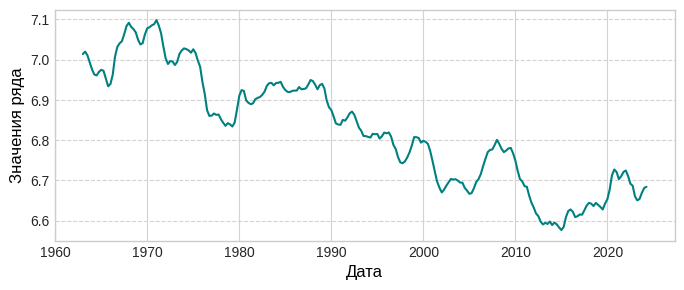

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rc("figure", figsize=(8,3))

plt.plot(series, color='teal')

plt.xlabel('Дата', fontsize = 12, color='black')
plt.ylabel('Значения ряда', fontsize = 12, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=10, color='black')
plt.tick_params(axis='y', labelsize=10)

print(f'p-value теста Дики-Фулера = {adfuller(series.values)[1]}')

Данный ряд демонстрирует квартальный показатель с 1 января 1963 года по 30 июня 2024. Ряд является нестационарным в соответствии с тестом Дики-Фуллера ($p$-$value=0.73$), что можно заметить и визуально. Наблюдается ярко выраженная трендовая составляющая. Одним из решений проблемы нестационарности может быть взятие $n$-ной разности ряда, что стационаризует ряд и позволит построить AR**I**MA модель.

p-value теста Дики-Фулера = 6.278446514985713e-09


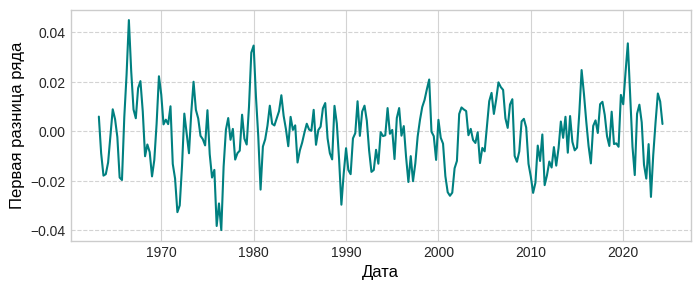

In [126]:
order1 = series[1:] - series[:-1].values

plt.plot(order1, color='teal')

plt.xlabel('Дата', fontsize = 12, color='black')
plt.ylabel('Первая разница ряда', fontsize = 12, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=10, color='black')
plt.tick_params(axis='y', labelsize=10)

print(f'p-value теста Дики-Фулера = {adfuller(order1.values)[1]}')

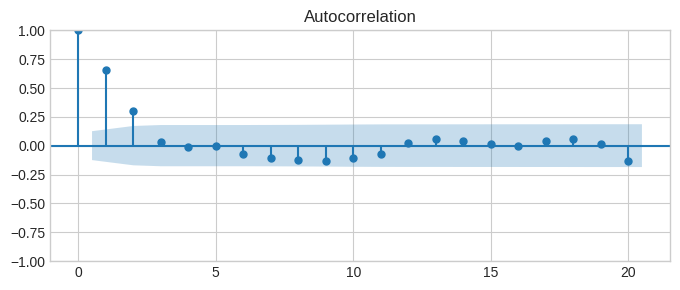

In [123]:
tsp.plot_acf(x=order1.values, lags=20, alpha=0.05)
plt.show()

Так как тест Дики-Фулера утверждает, что ряд стационарен, процесс колеблется рядом с нулевым средним и автокорреляция быстро уходит в ноль, то можно заявить, что $I=1$ будет достаточным порядком разностей для стационаризации ряда. Это соотносится с известной теоретической выкладкой о том, что ряд с постоянным трендом (который было видно на рисунке ранее) стационарен в первой разности.

Мы также видим, что коэффициенты автокорреляции становятся незначимыми на глубине $k>2$, таким образом глубина $MA$-процесса в нашей модели будет равна 2. Далее, построим график частичной автокорреляции остатков модели $ARIMA(0, 1, 2)$ для определения глулбины авторегрессионной составляющей.

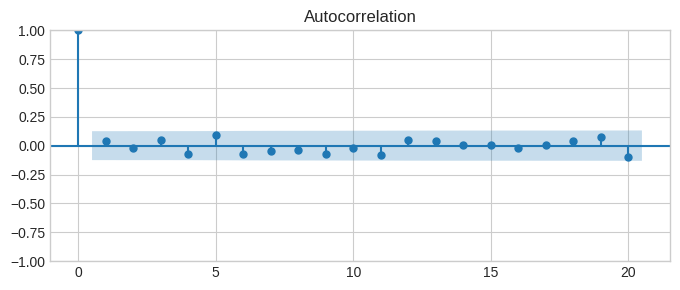

In [124]:
model0 = sm.tsa.ARIMA(series, order = (0,1,2)).fit()
tsp.plot_acf(x=model0.resid.values[1:], lags=20, alpha=0.05)
plt.show()

Так как частичная автокорреляция остатков модели $ARIMA(0,1,2)$ незначима на любой глубине $k$, то можно заключить, что необходимая глубина $AR$-процесса в нашей модели будет равна 0.

Итоговая модель для работы с данным временным рядом представляет собой $ARIMA(0, 1, 2)$ модель 

## Задание на уровень 5

Оценим модель $ARIMA(0, 1, 2)$

In [159]:
model1 = sm.tsa.ARIMA(series, order = (0,1,2)).fit()
print(model1.summary())

inf1 = np.array([model1.aic, model1.bic, model1.hqic])

                               SARIMAX Results                                
Dep. Variable:               Козловец   No. Observations:                  246
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 796.889
Date:                Tue, 17 Dec 2024   AIC                          -1587.779
Time:                        00:33:11   BIC                          -1577.275
Sample:                    01-01-1963   HQIC                         -1583.549
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7421      0.052     14.199      0.000       0.640       0.845
ma.L2          0.5520      0.049     11.318      0.000       0.456       0.648
sigma2      8.712e-05   7.71e-06     11.299      0.0

Как мы можем видеть, в соответствии с Q-тестом Льюнг-Бокса ($p$-$value=0.50$) мы не можем отвергнуть гипотезу о том, что остатки модели представляют собой белый шум. \
Также, $p$-$value=0.32$ теста Голдфелда-Куандта показывает, что мы не можем отвергнуть нулевую гипотезу о том, что остатки модели гомоскедастичны.\
Более того, тест Харке-Бера с $p$-$value=0.86$ указал на нормальность остатков модели.

## Задание на 6

Подберем новую модель и протестируем ее разницу с основной используя информационные критерии. Для этого, стационаризуем ряд при помощи вычитания полинома третьей степени.

In [4]:
X = np.array(pd.RangeIndex(0, series.shape[0])).reshape((-1, 1))

polynom = PolynomialFeatures(3)
X_polinomic = polynom.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_polinomic, series)
trend = pol_reg.predict(X_polinomic)

p-value теста Дики-Фулера = 0.0065582773253858775


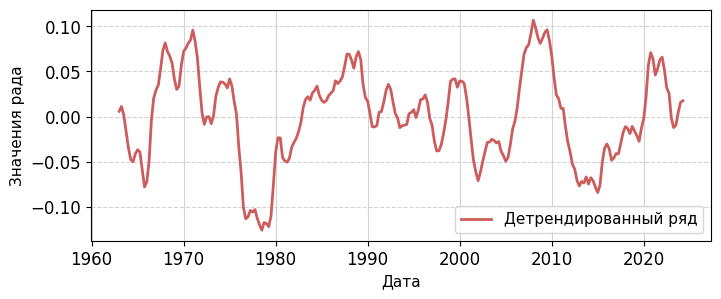

In [5]:
detrend = series - trend

print(f'p-value теста Дики-Фулера = {adfuller(detrend)[1]}')

plt.figure(figsize = [8, 3])

plt.plot(series.index, detrend, color='indianred', linewidth = 2,
         label='Детрендированный ряд')

plt.xlabel('Дата', fontsize = 11, color='black')
plt.ylabel('Значения рада', fontsize = 11, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=12, color='black')
plt.tick_params(axis='y', labelsize=12)
plt.legend(fontsize=11)

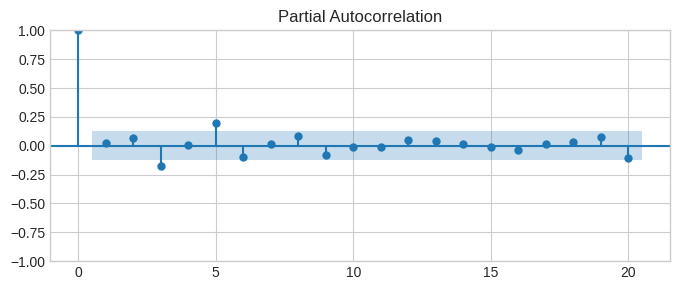

In [9]:
model0 = sm.tsa.ARIMA(detrend, order = (2,0,1)).fit()
tsp.plot_pacf(x=model0.resid.values[1:], lags=20, alpha=0.05)
plt.show()

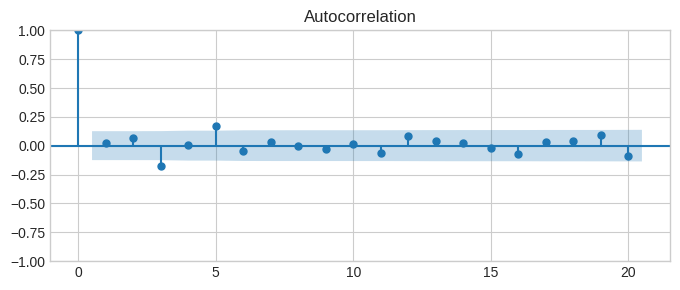

In [10]:
tsp.plot_acf(x=model0.resid.values[1:], lags=20, alpha=0.05)
plt.show()

Модель вида ARIMA(2, 0, 1) позволяет убрать автокоррелированность ряда и именно она будет оценена в качестве альтернативной.

In [158]:
model2 = sm.tsa.ARIMA(detrend, order = (2,0,1)).fit()
print(model2.summary())

inf2 = np.array([model2.aic, model2.bic, model2.hqic])

                               SARIMAX Results                                
Dep. Variable:               Козловец   No. Observations:                  246
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 798.666
Date:                Tue, 17 Dec 2024   AIC                          -1587.333
Time:                        00:33:06   BIC                          -1569.806
Sample:                    01-01-1963   HQIC                         -1580.276
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.012      0.021      0.983      -0.024       0.024
ar.L1          1.5313      0.079     19.481      0.000       1.377       1.685
ar.L2         -0.5902      0.076     -7.756      0.0

In [168]:
model_eval = pd.DataFrame([inf1, inf2])
model_eval.columns = ['AIC', 'BIC', 'HQIC']
model_eval.index = ['model 1', 'model 2']

model_eval

,AIC,BIC,HQIC
model 1,-1587.778705,-1577.274930,-1583.548844
model 2,-1587.332815,-1569.806157,-1580.275645


AIC критерий не дает информации о более предпочтительной модели. Критерий BIC демонстрирует, что модель 2 лучше модели 1. Критерий HQIC также утверждает превосходство модели 2 над моделью 1.

## Задание на 7

In [14]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

In [15]:
data2 = pd.read_excel('/home/cocochamba/Downloads/exam.xlsx', sheet_name='Задания на 6-10').dropna().iloc[:, 1:]
data2.set_index(index[96:-6], inplace=True)
data2.head()

,"Инфляция, кв/кв (не в %)","Реальный ВВП \n(напр., в ценах 2018 г., млрд руб.)","Ставка ЦБ, %","Валютный курс\n (напр., руб./доллар)","Цена нефти (напр., доллар)"
1987-01-01,0.042420,3031.065313,18.000000,99.484316,59.739892
1987-04-01,0.046144,3019.019497,18.002812,100.246013,61.081267
1987-07-01,0.051609,3174.756585,18.022412,97.766775,62.262983
1987-10-01,0.073889,3256.481462,18.057708,92.904645,63.939299
1988-01-01,0.083976,3222.206717,18.090579,86.117499,65.455695


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

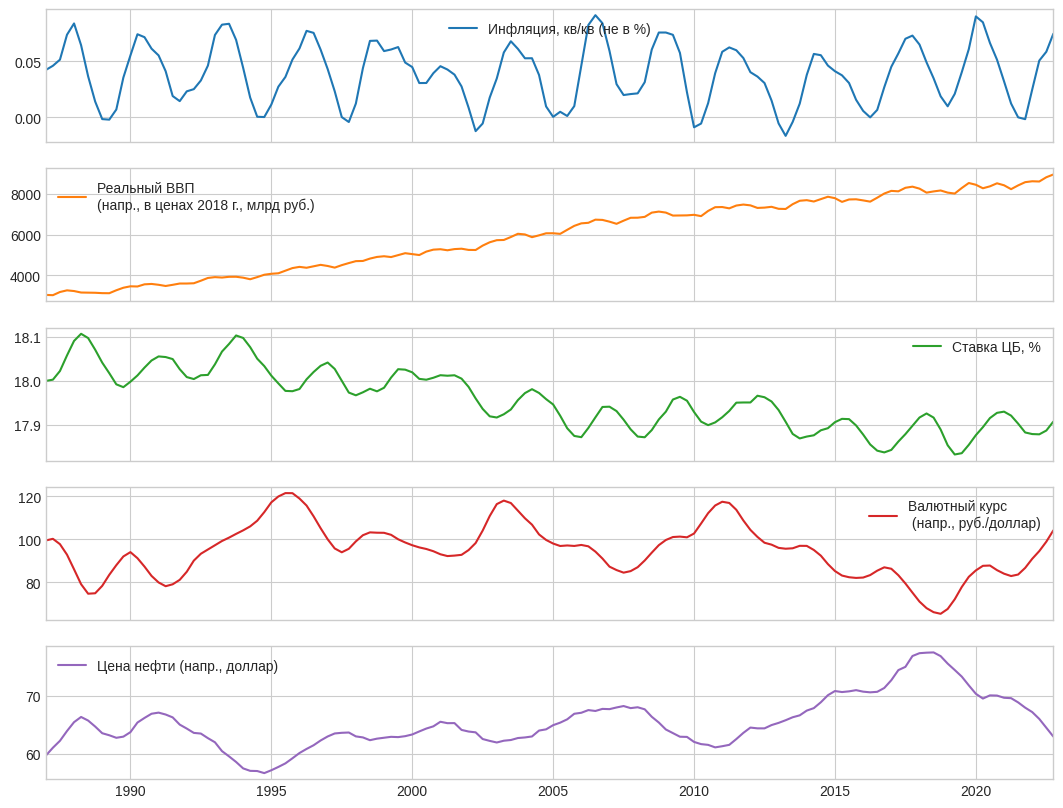

In [185]:
data2.plot(subplots=True, figsize=(13, 10))

In [289]:
print(f'p-value теста Дики-Фулера = {adfuller(data2['Инфляция, кв/кв (не в %)'].values)[1]}')

p-value теста Дики-Фулера = 0.1706268261185746


Визуально заметим, что инфляция обладает лишь постоянным свдигом от 0. Несмотря на результаты теста Дики-Фулера мы можем визуально отметить, что временной ряд стационарен.

In [16]:
endog = data2['Инфляция, кв/кв (не в %)']
exog = data2[['Валютный курс\n (напр., руб./доллар)']]

Подберем оптимальные порядки модели

In [274]:
sel_aic = ardl_select_order(
    endog, 5, exog, 5, ic="aic", trend="c", glob=True)
sel_bic = ardl_select_order(
    endog, 5, exog, 5, ic="bic", trend="c", glob=True, seasonal=True)
sel_hqic = ardl_select_order(
    endog, 5, exog, 5, ic="hqic", trend="c", glob=True, seasonal=True)
print(f"Оптимальной порядок модели: \nAIC: {sel_aic.model.ardl_order}, \n\
BIC: {sel_bic.model.ardl_order}, \nHQIC: {sel_hqic.model.ardl_order}")

Оптимальной порядок модели: 
AIC: (4, 5), 
BIC: (4,), 
HQIC: (4, 5)


Критерий AIC и HQIC выбрали лаги эндогенной переменной $k \in \{1, 2, 3, 4\}$ и экзогенной переменной $l \in \{1, 2, 4, 5\}$

In [275]:
res = sel_aic.model.fit(cov_type='HAC', cov_kwds={"maxlags":2})
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARDL Model Results                                 
====================================================================================
Dep. Variable:     Инфляция, кв/кв (не в %)   No. Observations:                  144
Model:                           ARDL(4, 5)   Log Likelihood                 493.995
Method:                     Conditional MLE   S.D. of innovations              0.007
Date:                      Tue, 17 Dec 2024   AIC                           -967.990
Time:                              02:16:29   BIC                           -938.574
Sample:                          04-01-1988   HQIC                          -956.037
                               - 10-01-2022                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0218      0.006      3.950      0.000       0.011       0.033
Инфляция, кв/кв (не в %).L1                1.4972      0.083     18.146      0.000       1.334       1.660
Инфляция, кв/кв (не в %).L2               -1.0548      0.160     -6.604      0.000      -1.371      -0.739
Инфляция, кв/кв (не в %).L3                0.4555      0.159      2.867      0.005       0.141       0.770
Инфляция, кв/кв (не в %).L4               -0.3350      0.094     -3.561      0.001      -0.521      -0.149
Валютный курс
 (напр., руб./доллар).L1     0.0019      0.001      3.279      0.001       0.001       0.003
Валютный курс
 (напр., руб./доллар).L2    -0.0030      0.001     -3.259      0.001      -0.005      -0.001
Валютный курс
 (напр., руб./доллар).L4     0.0026      0.001      3.250      0.001       0.001       0.004
Валютный курс
 (напр., руб./доллар).L5    -0.0015      0.000     -3.226      0.002      -0.002      -0.001
==========================================================================================================
"""

Из модели видно, что прирост квартального соотношения инфляции в прошлом квартале на 1 в среднем приводит в текущем квартале к ее увеличению на 1.5. В то же время изменение на +1 два квартала назад приводит к падению инфляции в среднем на 1.05. Прирост 3 квартала назад к увеличению на 0.46 в текущем квартале, то же изменение год назад приводит к сокращению в среднем на 0.33. Такие оценки параметров с чередованием знака намекают на наличие ярковыраженной сезонности в данных.

Приращение валютного курса в прошлом квартале на 1 рубль приводит к росту соотношения межквартальной инфляции на 0.0019. Аналогичное изменение курса пол года назад приводит к падению инфляции на 0.003. Рост курса на 1 рубль год назад в среднем соответствует увеличению инфляции сегодня на 0.0026. Наконец, выше названное изменения курса 5 кварталов наза среднестатистически провоцирует сокращения текущей инфляции на 0.0015.

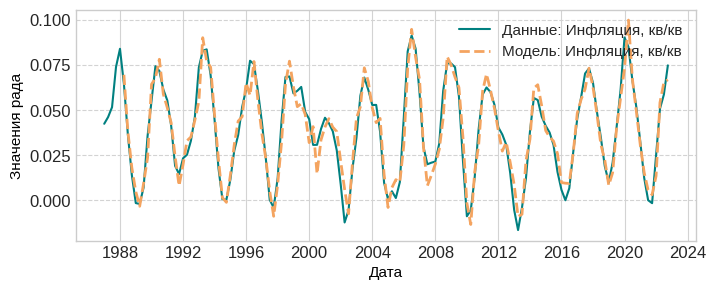

In [276]:
plt.figure(figsize = [8, 3])

plt.plot(endog, color='teal', linewidth = 1.5,
         label='Данные: Инфляция, кв/кв')

plt.plot(res.fittedvalues, color='sandybrown', linewidth = 2,
         label='Модель: Инфляция, кв/кв', linestyle='--')

plt.xlabel('Дата', fontsize = 11, color='black')
plt.ylabel('Значения рада', fontsize = 11, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=12, color='black')
plt.tick_params(axis='y', labelsize=12)
plt.legend(fontsize=11)

In [258]:
print(res.diagnostic_summary())

             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
      1.928      0.381      0.288      3.021


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      0.306      0.580          1
         2      0.946      0.623          2
         3      1.186      0.756          3
         4      2.776      0.596          4
         5      3.113      0.683          5
         6      3.428      0.754          6
         7      3.118      0.874          7
         8      3.101      0.928          8
         9      3.108      0.960          9
        10      3.525      0.966         10
-------------------------------------------


Тест Харке-Бера с $p$-$value=0.381$ указает, что мы не можем отвергнуть гипотезу о нормальности остатков модели. \
Тест авторегрессионной условной гетероскедастичности Энгеля измеряет значимость вцелом регрессии начального ряда (инфляция) на лаги квадратов остатков модели от $1$ до $n$. В данном случае тест измерен 10 раз для разных $n \in [1, 10]$, как мы видим, независимо от глубины, остатки модели гомоскедастичны.

## Задание на 8

In [11]:
from PyEMD import EMD, Visualisation

import warnings
warnings.filterwarnings('ignore')

В данном случае мы постараемся детрендировать ряды без использования первых разностей, чтобы "сохранить" информацию о инициализации в ряде и, таким образом, обеспечить интерпретируемость детрендированного ряда, аналогичную изначальному.

Для этого будет использован метод эмперических мод (EMD).

### Инфляция

Как отмечалось ранее, временной ряд инфляции будет предполагаться стационарным.

### ВВП

In [17]:
print(f'p-value теста Дики-Фулера = {adfuller(data2['Реальный ВВП \n(напр., в ценах 2018 г., млрд руб.)'].values)[1]}')

p-value теста Дики-Фулера = 0.6627024317557526


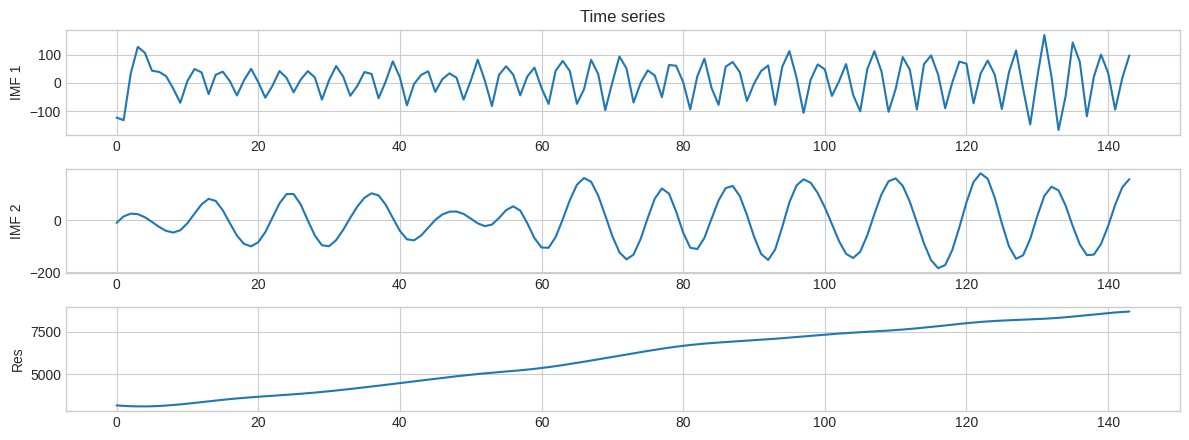

In [18]:
emd = EMD()
emd.emd(data2['Реальный ВВП \n(напр., в ценах 2018 г., млрд руб.)'].values)
imfs, res = emd.get_imfs_and_residue()

visa = Visualisation()
visa.PLOT_WIDTH=12
visa.plot_imfs(imfs, res)

p-value теста Дики-Фулера = 1.2473767095701735e-07


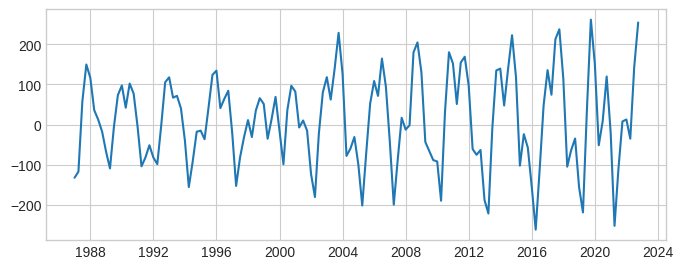

In [19]:
detrend_gdp = data2['Реальный ВВП \n(напр., в ценах 2018 г., млрд руб.)'] - res
plt.plot(detrend_gdp)
print(f'p-value теста Дики-Фулера = {adfuller(detrend_gdp.values)[1]}')

Из ряда реального ВВП была вычтена трендовая компонента полученная методом эмпирических мод. Одним из минусов метода является тот факт, что компоненты являются композициями гармоник. Как следствие - у них есть незатухающий период осциляции и по этой причине на своих концах ряд тренда чрезмерно "загнут", что может плохо сказаться на качестве прогнозов. Однако, так как наша задача не прогноз, то данный метод может быть оптимально применен.

### Ставка ЦБ

In [301]:
print(f'p-value теста Дики-Фулера = {adfuller(data2['Ставка ЦБ, %'].values)[1]}')

p-value теста Дики-Фулера = 0.6627024317557526


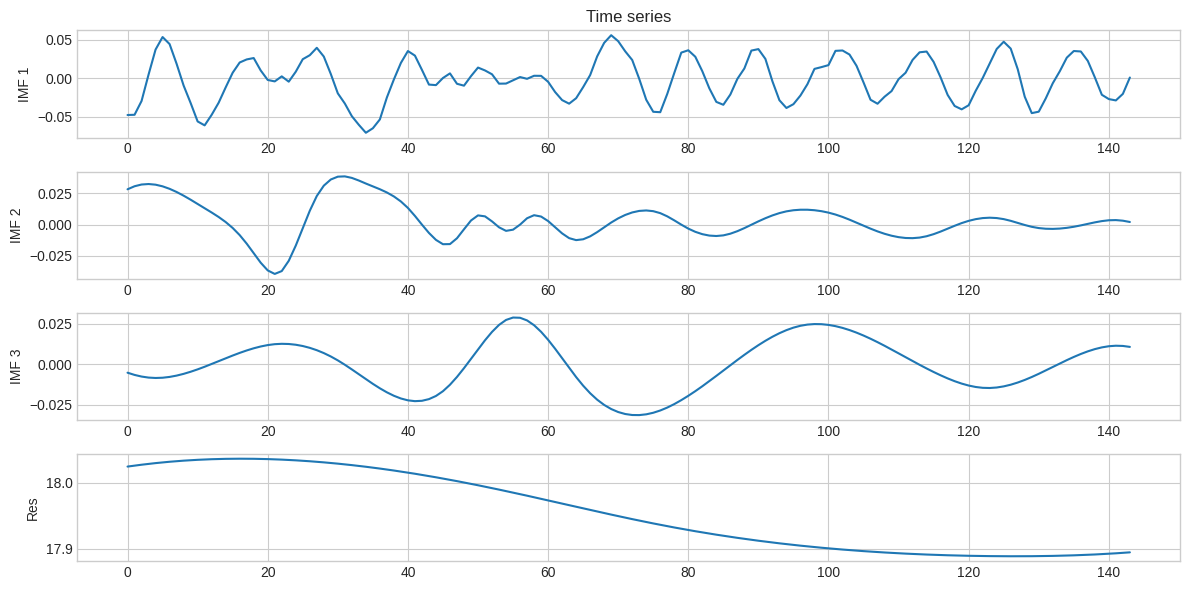

In [20]:
emd = EMD()
emd.emd(data2['Ставка ЦБ, %'].values)
imfs, res = emd.get_imfs_and_residue()

visa = Visualisation()
visa.PLOT_WIDTH=12
visa.plot_imfs(imfs, res)

p-value теста Дики-Фулера = 0.012716971205891589


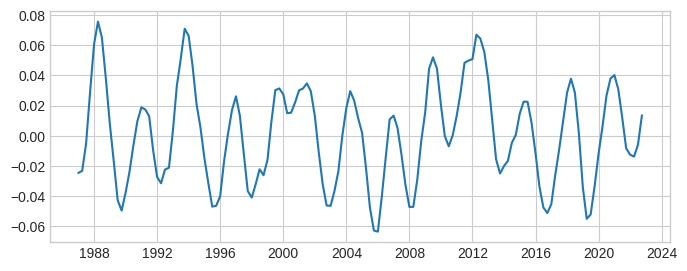

In [22]:
detrend_cbi = data2['Ставка ЦБ, %'] - res
plt.plot(detrend_cbi)
print(f'p-value теста Дики-Фулера = {adfuller(detrend_cbi.values)[1]}')

Из ряда ставки ЦБ была вычтена трендовая компонента полученная методом эмпирических мод.

### Валютный курс

In [304]:
print(f'p-value теста Дики-Фулера = {adfuller(data2['Валютный курс\n (напр., руб./доллар)'].values)[1]}')

p-value теста Дики-Фулера = 0.15065870348502175


<Axes: >

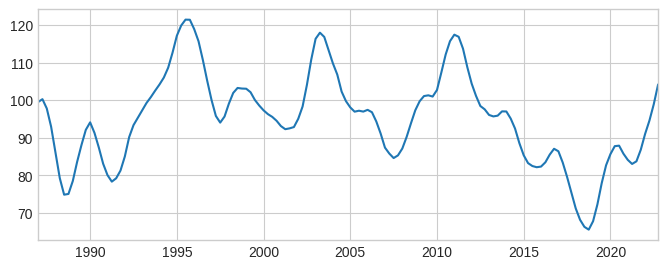

In [323]:
data2['Валютный курс\n (напр., руб./доллар)'].plot()

И хотя в соответствии с адф-тестом ряд не является стационарным, мы видим отсутствие выраженного тренда, ровно как и отсутствие сезонности и потому предполагаем, что ряд все таки стационарен.

### Цена нефти

In [326]:
print(f'p-value теста Дики-Фулера = {adfuller(data2['Цена нефти (напр., доллар)'].values)[1]}')

p-value теста Дики-Фулера = 0.05746799819005388


Ряд стационарен

### Теоретическое обоснование и построение модели

- Очевидно, что в VAR процесс ставка центрального банка должна войти эндогенно, так как рост цен заставляет ЦБ повышать ставку, что изменяет количество денег обращающихся в экономике и заставляет инфляцию сокращаться, что в свою очередь заставляет центральный банк уже снижать ставку и так далее. 
- Также, внутри модельной зависимости должен оказаться Реальный ВВП, так как в среднем высокая инфляция в текущем году ведет к низкому росту реального ВВП в следующем году, при этом высокий рост ВВП сейчас приводит к увеличению инфляции в последующие периоды. 
- При этом, цена нефти будет экзогенной переменной, ведь она определяет многие энергетические издержки производителей и бюджетную выручку стран-экспортеров, а значит и их расходы, обратное, однако, не верно.
- Валютный курс предполагается экзогенным, так как в большей степени зависит от сторонних факторов и, предположительно, не имеет двухсторонней связи с инфляцией, а вместо этого односторонне изменяется с запазданием в ответ на изменения уровня цен.

In [23]:
data2.columns = ['Инфляция', "Реальный ВВП", "Ставка ЦБ", "Валютный курс", "Цена нефти"]

In [24]:
data2['Валютный курс'] = np.log(data2['Валютный курс'])
data2['Реальный ВВП'] = np.log(data2['Реальный ВВП'])
data2['Цена нефти'] = np.log(data2['Цена нефти'])

Мы также берем логарифмы от переменных Валютного курса, Цен на нефть и Реального ВВП для того, чтобы привести данные к одинаковой размерности.

In [25]:
inner = data2[['Инфляция', 
               'Реальный ВВП', 
               'Ставка ЦБ']]

outer = data2[['Валютный курс',
               'Цена нефти']]

Оценим VARMAX(2, 1)

In [37]:
model = sm.tsa.VARMAX(inner, outer, (1, 1)).fit(method='nm')
print(model.summary())

                                       Statespace Model Results                                      
Dep. Variable:     ['Инфляция', 'Реальный ВВП', 'Ставка ЦБ']   No. Observations:                  144
Model:                                           VARMAX(1,1)   Log Likelihood                1212.867
                                                 + intercept   AIC                          -2359.735
Date:                                       Tue, 17 Dec 2024   BIC                          -2261.731
Time:                                               15:55:12   HQIC                         -2319.912
Sample:                                           01-01-1987                                         
                                                - 10-01-2022                                         
Covariance Type:                                         opg                                         
Ljung-Box (L1) (Q):      3.72, 67.70, 2.67   Jarque-Bera (JB):     2.41, 4.39, 0.8

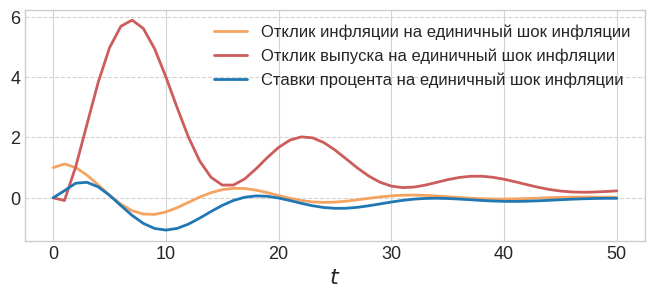

In [38]:
irf = model.impulse_responses(50, 0).iloc[:, 0]
irf1 = model.impulse_responses(50, 0).iloc[:, 1]
irf2 = model.impulse_responses(50, 0).iloc[:, 2]

plt.plot(irf, color='sandybrown', label='Отклик инфляции на единичный шок инфляции', linewidth=2)
plt.plot(irf1, color='indianred', label='Отклик выпуска на единичный шок инфляции', linewidth=2)
plt.plot(irf2, color='C0', label='Ставки процента на единичный шок инфляции', linewidth=2)

plt.xlabel('$t$', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.legend(fontsize=12)

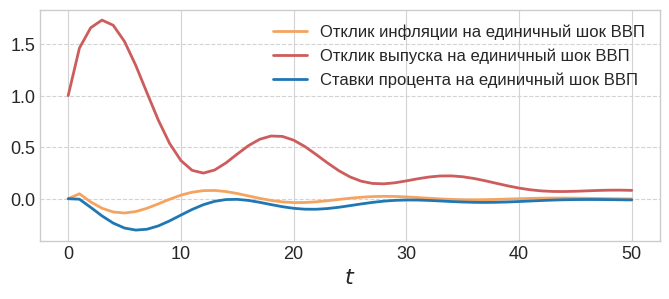

In [39]:
irf = model.impulse_responses(50, 1).iloc[:, 0]
irf1 = model.impulse_responses(50, 1).iloc[:, 1]
irf2 = model.impulse_responses(50, 1).iloc[:, 2]

plt.plot(irf, color='sandybrown', label='Отклик инфляции на единичный шок ВВП', linewidth=2)
plt.plot(irf1, color='indianred', label='Отклик выпуска на единичный шок ВВП', linewidth=2)
plt.plot(irf2, color='C0', label='Ставки процента на единичный шок ВВП', linewidth=2)

plt.xlabel('$t$', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.legend(fontsize=12)

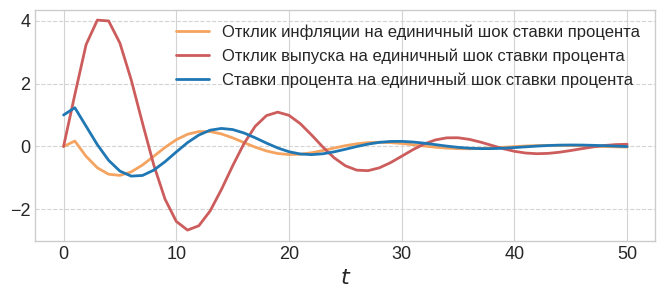

In [40]:
irf = model.impulse_responses(50, 2).iloc[:, 0]
irf1 = model.impulse_responses(50, 2).iloc[:, 1]
irf2 = model.impulse_responses(50, 2).iloc[:, 2]

plt.plot(irf, color='sandybrown', label='Отклик инфляции на единичный шок ставки процента', linewidth=2)
plt.plot(irf1, color='indianred', label='Отклик выпуска на единичный шок ставки процента', linewidth=2)
plt.plot(irf2, color='C0', label='Ставки процента на единичный шок ставки процента', linewidth=2)

plt.xlabel('$t$', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.legend(fontsize=12)